In [1]:
library(tidyverse)
library(cowplot)
library(gridExtra)
library(grid)
library(GGally)
library(network)
library(sna)

# Custom package
library(rutils)

-- Attaching packages -------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ----------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    

In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 8
label_text_size <- 8
small_text_size <- 8
guide_size <- 4
family <- "ArialMT"
dpi <- 320
ht <- 5
wd <- 6
pt_to_mm <- 5 / 14

In [4]:
optplot_figs <- list()

for (idx in 1:3) {
    optplot_figs[[projects[idx]]] <- load(paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[idx], "_glmnet_optplots.RData"))
}
optplot_figs <- Reduce(c, optplot_figs)

In [5]:
optplot_figs

[1] "CESC_cph_optplot" "CESC_mr_optplot"  "UCS_cph_optplot"  "UCS_mr_optplot"  
[5] "UCEC_cph_optplot" "UCEC_mr_optplot"

In [6]:
set_margins <- function(plt, margins = c(0, 0, 0, 0)) {
    plt + theme(plot.margin = unit(margins, "cm"))
}

hide_legend <- function(plt) {
    plt + theme(legend.position = "none")
}

hide_axis_title <- function(plt, axis = "x.bottom") {
    if (axis == "x.bottom") {
        plt <- plt + theme(axis.title.x.bottom = element_blank())
    }
    else if (axis == "x.top") {
        plt <- plt + theme(axis.title.x.top = element_blank())
    }
    else if (axis == "y") {
        plt <- plt + theme(axis.title.y = element_blank())
    }
    plt
}

hide_axis_text <- function(plt, axis = "x.bottom") {
    if (axis == "x.bottom") {
        plt <- plt + theme(axis.text.x.bottom = element_blank())
    }
    else if (axis == "y") {
        plt <- plt + theme(axis.text.y = element_blank())
    }
}

In [7]:
optplot_fig_list <- c(
    mget("CESC_mr_optplot") %>%
        purrr::map(function(p) { hide_axis_title(p, axis = "x.bottom") }),
    mget("UCEC_mr_optplot") %>%
        purrr::map(function(p) { hide_axis_title(p, axis = "x.bottom") }) %>%
        purrr::map(function(p) { hide_axis_title(p, axis = "y") }),
    mget("UCS_mr_optplot") %>%
        purrr::map(function(p) { hide_axis_title(p, axis = "x.bottom") }) %>%
        purrr::map(function(p) { hide_axis_title(p, axis = "y") }),
    mget("CESC_cph_optplot") %>%
        purrr::map(function(p) { hide_axis_title(p, axis = "x.top") }),
    mget("UCEC_cph_optplot") %>%
        purrr::map(function(p) { hide_axis_title(p, axis = "x.top") }) %>%
        purrr::map(function(p) { hide_axis_title(p, axis = "y") }),
    mget("UCS_cph_optplot") %>%
        purrr::map(function(p) { hide_axis_title(p, axis = "x.top") }) %>%
        purrr::map(function(p) { hide_axis_title(p, axis = "y") })
) %>%
    purrr::map(function(p) { set_margins(p) }) %>%
    purrr::map(function(p) { hide_legend(p) })

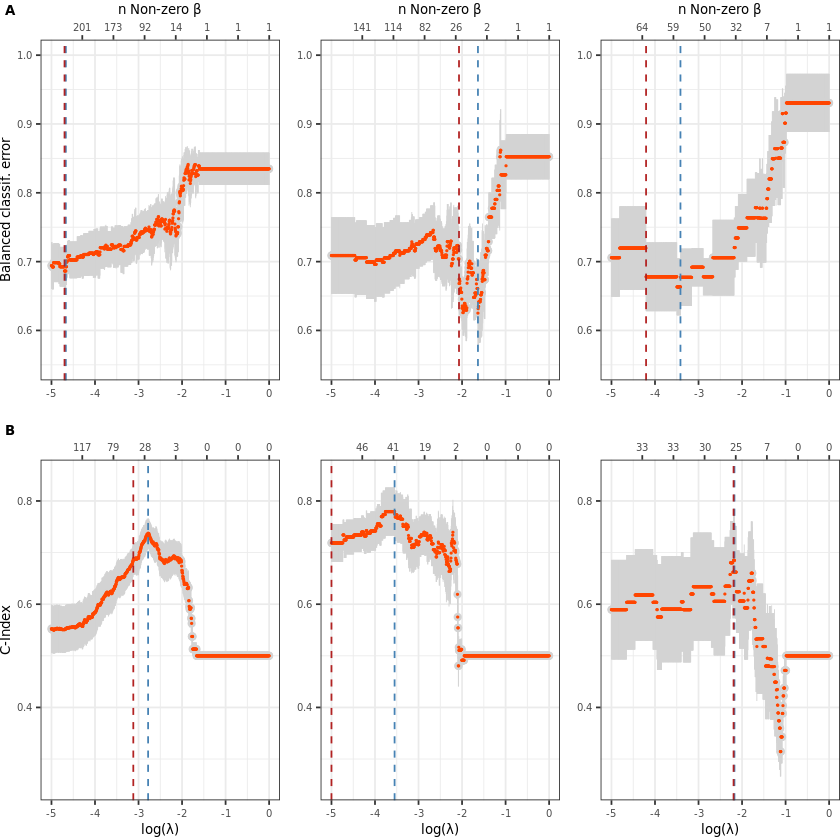

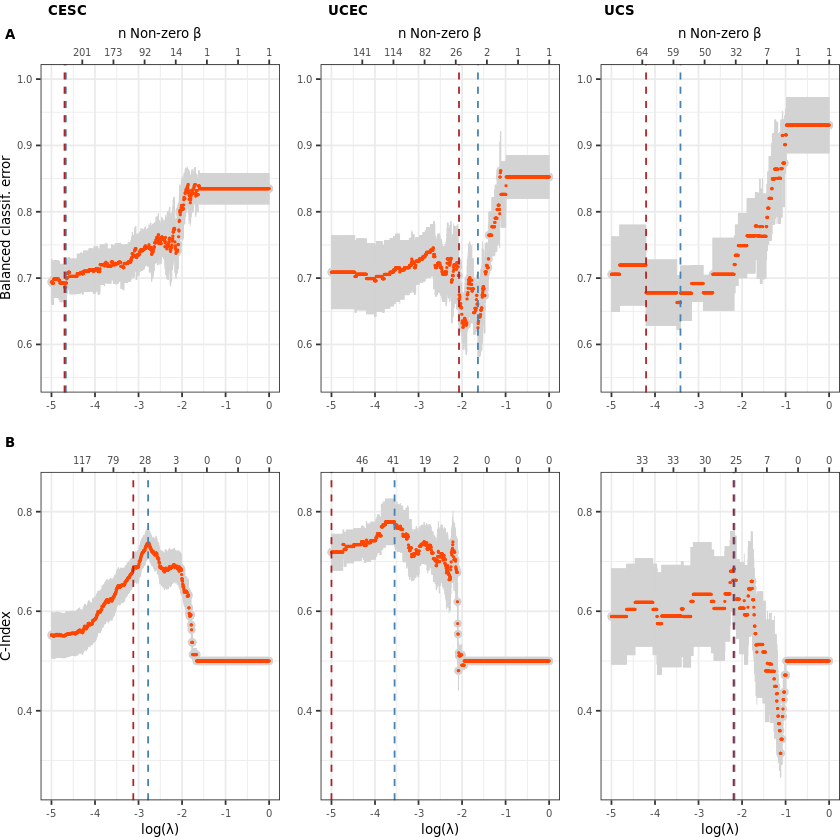

In [8]:
glmnet_grid <- plot_grid(
    optplot_fig_list[[1]],
    optplot_fig_list[[2]],
    optplot_fig_list[[3]],
    optplot_fig_list[[4]],
    optplot_fig_list[[5]],
    optplot_fig_list[[6]],
    ncol = 3,
    labels = c("A", "", "", "B", "", ""),
    label_fontfamily = family,
    label_size = label_text_size,
    label_fontface = "bold",
    align = "vh"
)
glmnet_grid

glmnet_grid <- plot_grid(
    plot_grid(NULL, NULL, NULL, labels = c("CESC", "UCEC", "UCS"), nrow = 1, label_fontfamily = family, label_size = text_size, label_fontface = "bold", label_x = 0.1),
    glmnet_grid,
    nrow = 2,
    rel_heights = c(0.03, 1)
)
glmnet_grid

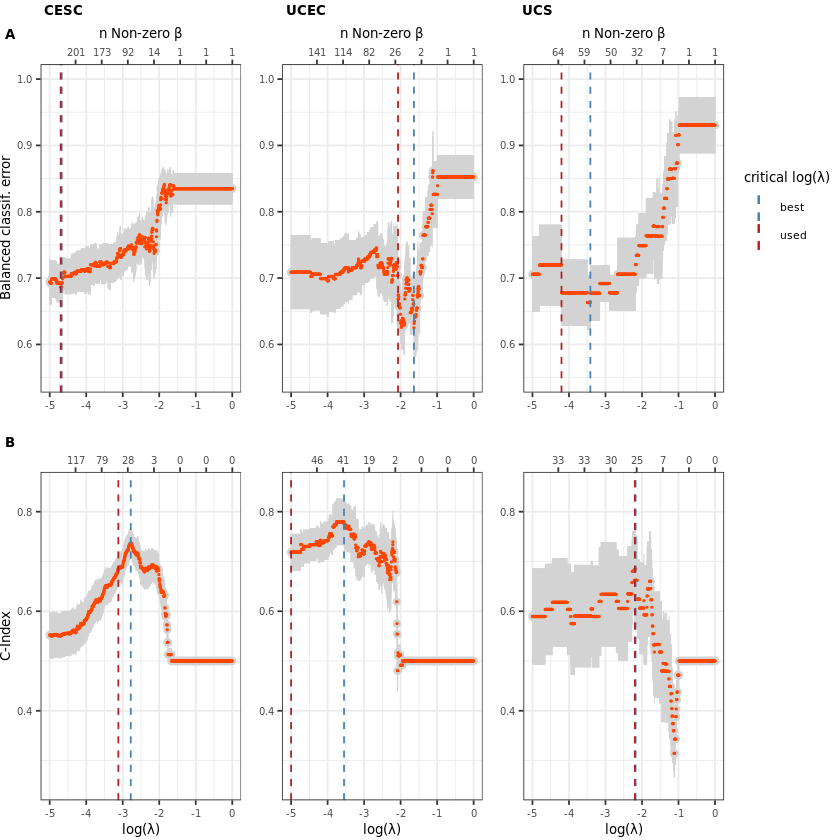

In [9]:
figS3 <- plot_grid(
    glmnet_grid,
    plot_grid(get_legend(optplot_fig_list[[1]] + theme(legend.position = "right")), NULL, nrow = 2),
    ncol = 2,
    rel_widths = c(1, 0.16)
)
figS3

In [10]:
ggsave(filename = paste0(dirs$figures_dir, "/paneled/figureS3.png"), plot = figS3, dpi = dpi, height = ht, width = wd)